In this project, we performed linear and logistic regression on a churn dataset to predict customer churn. we also implemented both models manually and evaluated their performance using accuracy, precision, and F1 score.

1.  Loaded the churn dataset
2.  Split the dataset into training and test sets
1.  Preprocessed the data (e.g., removed outliers, scaled the features)
2. Implemented linear and logistic regression models from scratch
1.  Trained the models on the training set
2.  Evaluated the models on the test set using accuracy, precision, and F1 score








## **Dataset Selection:**


**Customer Churn in the Banking Industry**


In today's highly competitive banking world, banks need to know how their customers behave. One very important thing they study is when customers decide to leave their bank. This is what we call "customer churn." It's a big deal for banks because it affects how much money they make and how long they can stay in business.
So, we're here to take a closer look at the data we have, which tells us about customers who have decided to leave the bank. We want to understand why this happens and what the data can tell us about it.




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, accuracy_score, f1_score
from sklearn import metrics

#Dataset Source:
We took the dataset from the Kaggle website. (https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers)

In [ ]:
# loading the data from csv file to a Pandas DataFrame
churn_dataset = pd.read_csv('/content/churn.csv')


# Features and Target Variables

#Categorical Features:
- Geograph
- Gender
- Number of Product
- Has Credit Card
- Exited

# **For Linear Regression:**
**Features (X):**



1.  CreditScore
2.  Age

1.   Geography
2.   Gender

1.  Tenure
2.  Balance

1.  NumOfProducts
2.  HasCrCard

1.  IsActiveMember
2.  Exited



***Target Variable (Y):*** *italicized text*

1.  EstimatedSalary




# **For Logistic Regression:**
**Features (X):**



1.  CreditScore
2.  Age

1.   Geography
2.   Gender

1.  Tenure
2.  Balance

1.  NumOfProducts
2.  HasCrCard

1.  IsActiveMember
2.  EstimatedSalary



**Target Variable (Y):**

1.  Exited


# Dataset Explanation:


In our data set we have following columns.

**RowNumber:**
An index or identifier for each record in the dataset. Row number is int type data ( int )

**CustomerId:**
 A unique identifier for each bank customer. It is also an int type data (int )

**Surname:**
The last name of the customer.(string)

**CreditScore:**
 The credit score of the customer, which represents their creditworthiness. (int )

**Geography:**
 The geographical location or country where the customer is located.(string )


**Gender:**
 The gender of the customer (e.g., male or female). It is string data type.

**Age:**
 The age of the customer.(int )

**Tenure:**
The number of years the customer has been with the bank.(int)

**Balance:**
The current account balance of the customer.(float)

**NumOfProducts:**
 The number of financial products the customer holds with the bank (e.g., accounts, loans, credit cards).(int )

**HasCrCard:**
 A binary indicator of whether the customer has a credit card (1 for yes, 0 for no).(int )

**IsActiveMember:**
 A binary indicator of whether the customer is an active member (1 for yes, 0 for no).(int)

**Estimated Salary:**
 This is an estimate of the customer's annual salary or income. (float)

**Exited:**
 A binary indicator of whether the customer has churned (1 for yes, 0 for no), which is likely the target variable for your analysis.(int)



In [ ]:
# first 5 rows of the dataframe
churn_dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# **Data Pre-processing:**

# Data Cleaning:

The **Customer Churn dataset is clean and free from missing values or duplicates**. Therefore,**there is no need for data cleaning techniques such as handling null values or removing duplicate rows**, making it ready for analysis and modeling.



<Axes: >

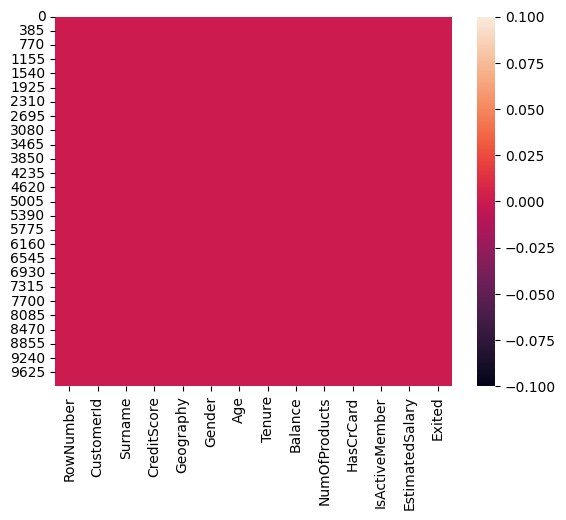

In [ ]:
sns.heatmap(churn_dataset.isnull())

# Handling Missing Data:



Sometimes, data might be missing from some columns. We need to decide what to do with those gaps. One option is to fill in the missing values with an average or a meaningful estimate. Another option is to remove the rows with missing data if it won't significantly affect our analysis,but the dataset that we have choosen is already in clean form but if in case we have to clean our data we can use following functions

**isnull():** Identifies missing values in the Dataset.

**fillna():**Fills missing values with a specified value or method.

**dropna():**Removes rows or columns with missing values.


Before we can dive into analyzing our dataset, we need to make sure it's in good shape. Data preprocessing is like data cleaning  it ensures that the data is clean and ready for analysis. Here are the key steps we'll take:

In [ ]:
# number of rows and columns
churn_dataset.shape

(10000, 14)

In [ ]:
# getting some informations about the dataset
churn_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# checking for missing values
churn_dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# **Exploratory Data Analysis (EDA)**

In [ ]:
# statistical Measures of the dataset
churn_dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


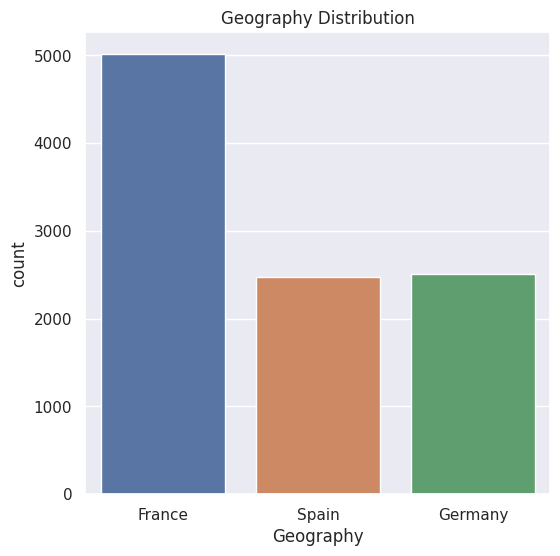

In [ ]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='Geography', data=churn_dataset)
plt.title('Geography Distribution')
plt.show()

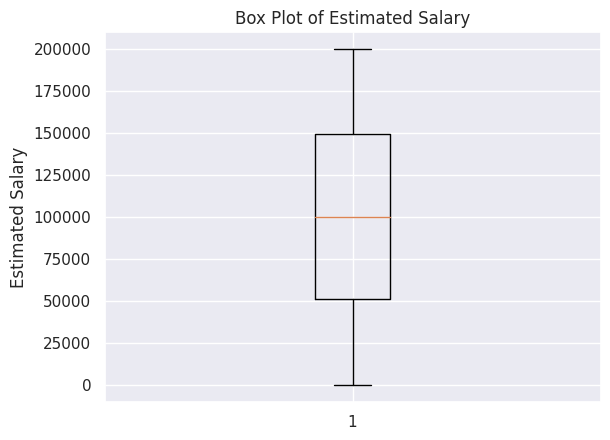

In [ ]:

import matplotlib.pyplot as plt

# Extract the "Estimated Salary" column from your churn_dataset
salary_data = churn_dataset['EstimatedSalary']

# Create a box plot for the "Estimated Salary" variable
plt.boxplot(salary_data)

# Add labels to the plot
plt.title('Box Plot of Estimated Salary')
plt.ylabel('Estimated Salary')

# Display the plot
plt.show()


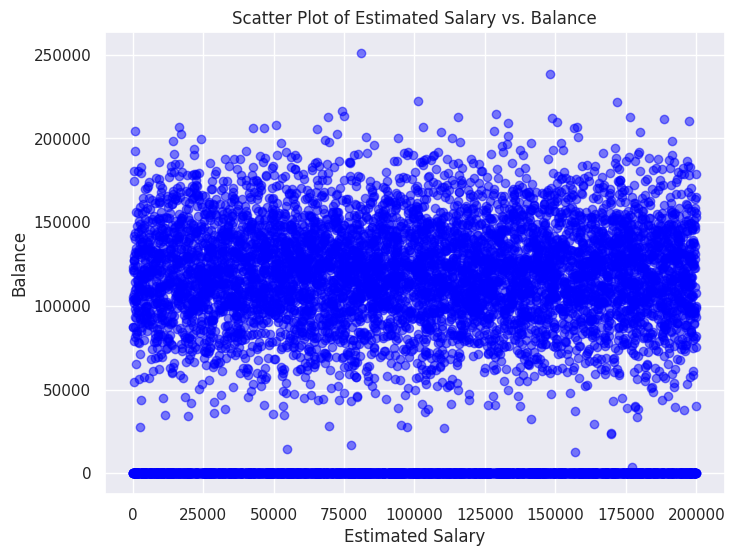

In [ ]:
estimated_salary = churn_dataset['EstimatedSalary']
balance = churn_dataset['Balance']

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(estimated_salary, balance, alpha=0.5, color='blue')

# Add labels and title
plt.xlabel('Estimated Salary')
plt.ylabel('Balance')
plt.title('Scatter Plot of Estimated Salary vs. Balance')

# Show the plot
plt.show()

In [ ]:
churn_dataset['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

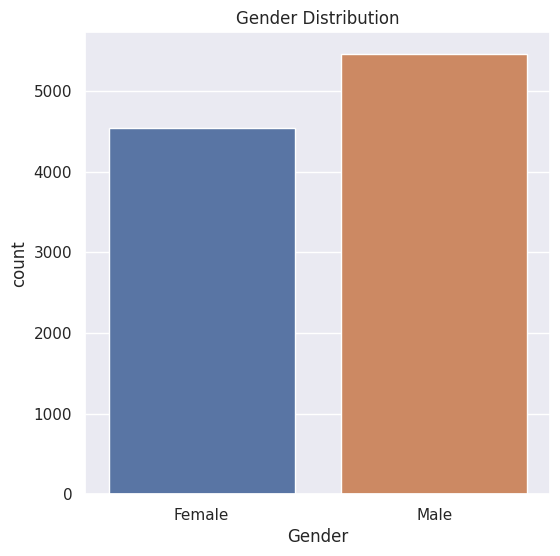

In [ ]:
# Gender Column
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='Gender', data=churn_dataset)
plt.title('Gender Distribution')
plt.show()

In [ ]:
churn_dataset['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

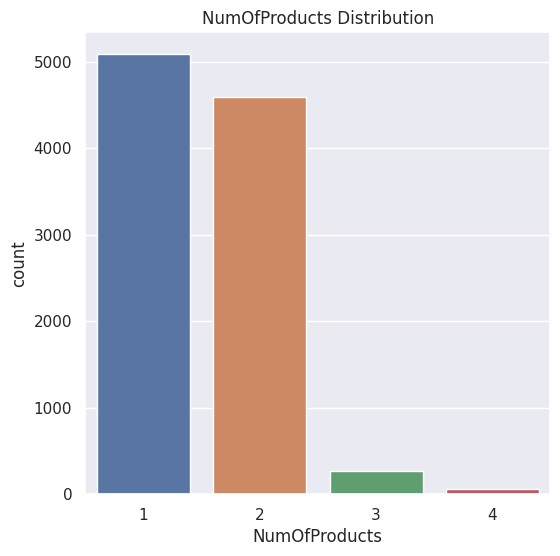

In [ ]:
#Number of Product Column
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='NumOfProducts', data=churn_dataset)
plt.title('NumOfProducts Distribution')
plt.show()

In [ ]:
churn_dataset['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

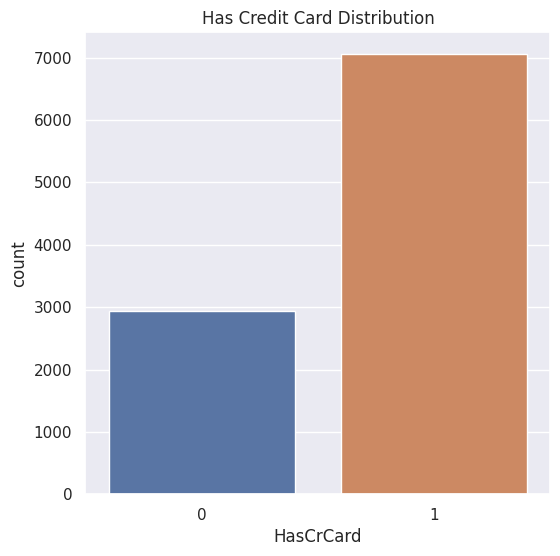

In [ ]:
#Number of Product Column
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='HasCrCard', data=churn_dataset)
plt.title('Has Credit Card Distribution')
plt.show()

In [ ]:
churn_dataset['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

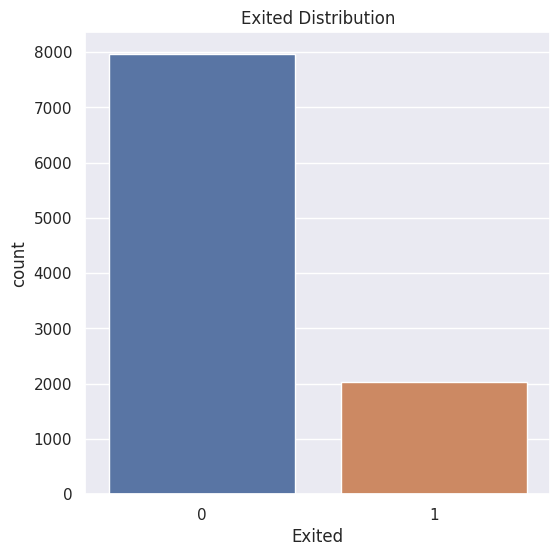

In [ ]:
#Number of Product Column
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='Exited', data=churn_dataset)
plt.title('Exited Distribution')
plt.show()

In [ ]:
churn_dataset['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

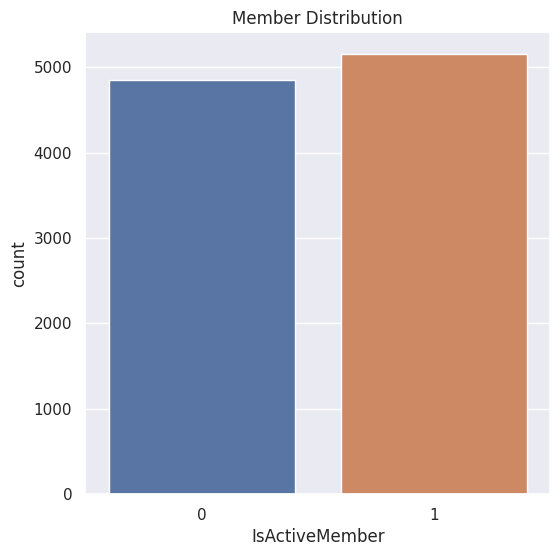

In [ ]:
#Number of Product Column
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='IsActiveMember', data=churn_dataset)
plt.title('Member Distribution')
plt.show()

In [ ]:
churn_dataset['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

<ipython-input-22-0b482f6d877d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn_dataset['CreditScore'])


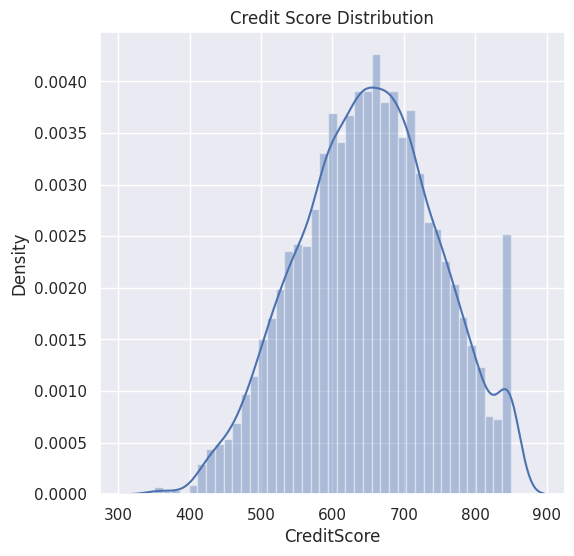

In [ ]:
# distribution of Credit Score
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(churn_dataset['CreditScore'])
plt.title('Credit Score Distribution')
plt.show()

In [ ]:
churn_dataset['CreditScore'].value_counts()

850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: CreditScore, Length: 460, dtype: int64

<ipython-input-24-7ba28fb949ce>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn_dataset['Age'])


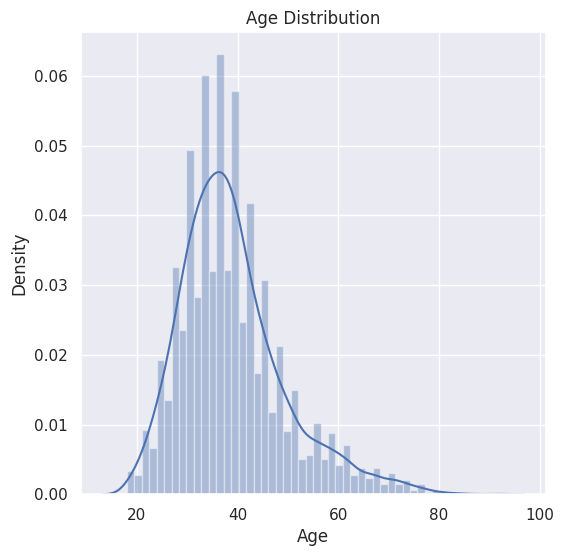

In [ ]:
# distribution of Age
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(churn_dataset['Age'])
plt.title('Age Distribution')
plt.show()

In [ ]:
churn_dataset['Age'].value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

# **Label Encoding**


 In this dataset we have seen that we have five categorical values which are Geograph,Gender,Number of Product,Has Credit Card,Exited.So, now we will convert them into in the form of numerical data so we our Machine Learning model can easily understand numerical values.


<Axes: xlabel='Geography', ylabel='count'>

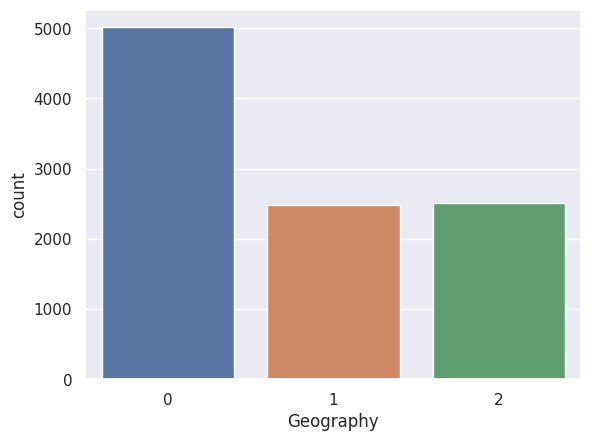

In [ ]:
# encoding geography column

geography_mapping={"France":0 ,
             "Spain":1,
             "Germany":2}
churn_dataset["Geography"] = churn_dataset["Geography"].replace(geography_mapping)


sns.countplot(x='Geography', data=churn_dataset)

<Axes: xlabel='Gender', ylabel='count'>

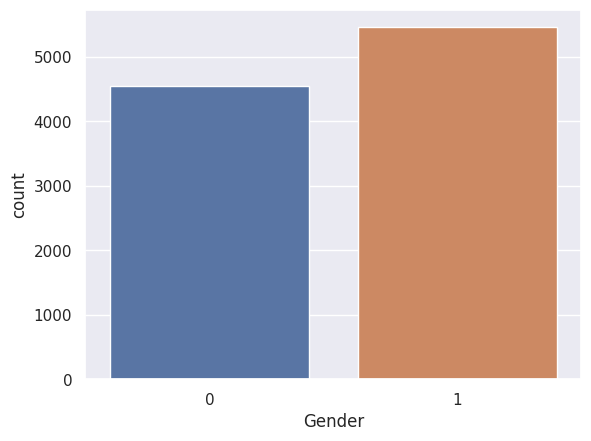

In [ ]:
# encoding gender column

gender_mapping={"Female":0 ,
             "Male":1}
churn_dataset["Gender"] = churn_dataset["Gender"].replace(gender_mapping)


sns.countplot(x='Gender', data=churn_dataset)

# **Linear Regression**

## Splitting the Features and Target


In [ ]:
churn_dataset = churn_dataset.drop(columns=['Surname', 'CustomerId','RowNumber'])

In [ ]:
X = churn_dataset.drop(columns='EstimatedSalary', axis=1)
Y = churn_dataset['EstimatedSalary']

In [ ]:
print(X)

      CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619          0       0   42       2       0.00              1   
1             608          1       0   41       1   83807.86              1   
2             502          0       0   42       8  159660.80              3   
3             699          0       0   39       1       0.00              2   
4             850          1       0   43       2  125510.82              1   
...           ...        ...     ...  ...     ...        ...            ...   
9995          771          0       1   39       5       0.00              2   
9996          516          0       1   35      10   57369.61              1   
9997          709          0       0   36       7       0.00              1   
9998          772          2       1   42       3   75075.31              2   
9999          792          0       0   28       4  130142.79              1   

      HasCrCard  IsActiveMember  Exited  
0        

In [ ]:
print(Y)

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64


## Splitting the data into Training data & Testing Data





In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(10000, 10) (8000, 10) (2000, 10)


# Model Training

In [ ]:
# loading the Linear Regression model
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train, Y_train)

LinearRegression()

#Model Evaluation

In [ ]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)

In [ ]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)

In [ ]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value : ', r2_train)

R squared value :  0.0017601856490009338


In [ ]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value : ', r2_test)



R squared value :  -0.003558253848513715


# Manual Linear Regression

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

csv_file_path = ('/content/churn.csv')
df = pd.read_csv(csv_file_path)

# features and target
X_categorical = df[['Surname', 'Geography', 'Gender']]
X_numerical = df[['CustomerId','CreditScore','Age', 'Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']]
y = df['Exited']

# One-hot encode categorical features
X_categorical_encoded = pd.get_dummies(X_categorical, columns=['Surname', 'Geography', 'Gender']).values

# Combine categorical and numerical features
X = np.c_[X_categorical_encoded, X_numerical]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training Set Size: {len(X_train)}")
print(f"Testing Set Size: {len(X_test)}")

# Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Testing the model
test_predictions = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, test_predictions)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_predictions)
print('Confusion Matrix:')
print(conf_matrix)




Training Set Size: 8000
Testing Set Size: 2000
Accuracy: 0.80
Confusion Matrix:
[[1607    0]
 [ 393    0]]


# Finding Precision,Accuracy,F-1 Score

In [ ]:
# Finding Precision,Accuracy,F-1 Score
# ...
# Logistic Regression model with class_weight parameter
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# Testing the model
test_predictions = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, test_predictions)
print(f'Accuracy: {accuracy:.2f}')

# Precision
precision = precision_score(y_test, test_predictions)
print(f'Precision: {precision:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions)
print(f'F1 Score: {f1:.2f}')

# Recall
# recall = recall_score(y_test, test_predictions)
# print(f'Recall: {recall:.2f}')


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_predictions)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.49
Precision: 0.23
F1 Score: 0.35
Confusion Matrix:
[[712 895]
 [119 274]]


# Manual Linear Classifier

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

class Perceptron:
    def __init__(self, input_size, learning_rate=0.01, epochs=100):
        self.weights = np.zeros(input_size + 1)
        self.learning_rate = learning_rate
        self.epochs = epochs

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return 1 if summation > 0 else 0

    def train(self, training_inputs, labels):
        for epoch in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)

# Load data
csv_file_path = ('/content/churn.csv')
df = pd.read_csv(csv_file_path)

# Features and target
X_categorical = df[['Surname', 'Geography', 'Gender']]
X_numerical = df[['CustomerId','CreditScore','Age', 'Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']]
y = df['Exited']

# One-hot encode categorical features
X_categorical_encoded = pd.get_dummies(X_categorical, columns=['Surname', 'Geography', 'Gender']).values

# Combine categorical and numerical features
X = np.c_[X_categorical_encoded, X_numerical]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training Set Size: {len(X_train)}")
print(f"Testing Set Size: {len(X_test)}")

# Perceptron model
perceptron_model = Perceptron(input_size=X.shape[1])
perceptron_model.train(X_train, y_train)

# Testing the model
test_predictions = np.array([perceptron_model.predict(x) for x in X_test])

# Accuracy
accuracy = accuracy_score(y_test, test_predictions)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_predictions)
print('Confusion Matrix:')
print(conf_matrix)


Training Set Size: 8000
Testing Set Size: 2000
Accuracy: 0.80
Confusion Matrix:
[[1607    0]
 [ 393    0]]


# Building a Predictive System

In [ ]:
input_data = (619,1,0,42,2,0.00,1,1,1,1)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])


[98429.86887607]
The insurance cost is USD  98429.86887607082


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#Logistic Regression

# Splitting the Data into Features and Target

In [ ]:
X = churn_dataset.drop(columns='Exited', axis=1)

In [ ]:
Y = churn_dataset['Exited']

In [ ]:
print(X)

      CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619          0       0   42       2       0.00              1   
1             608          1       0   41       1   83807.86              1   
2             502          0       0   42       8  159660.80              3   
3             699          0       0   39       1       0.00              2   
4             850          1       0   43       2  125510.82              1   
...           ...        ...     ...  ...     ...        ...            ...   
9995          771          0       1   39       5       0.00              2   
9996          516          0       1   35      10   57369.61              1   
9997          709          0       0   36       7       0.00              1   
9998          772          2       1   42       3   75075.31              2   
9999          792          0       0   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  


In [ ]:
print(Y)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64



# Splitting Data Into Test and Training Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(10000, 10) (8000, 10) (2000, 10)


# Model Training

In [ ]:
model = LogisticRegression()

In [ ]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

LogisticRegression()

# Model Evaluation

Accuracy Score

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)


Accuracy on Training data :  0.79625


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.7965


# Building a Predictive System

In [ ]:
input_data = (619,0,0,42,2,0.00,1,1,1,101348.88)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('Not Exited')
else:
  print('Exited')

[0]
Not Exited


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Manual Logistic Regression
with precision,accuracy,f-score

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

csv_file_path = '/content/churn.csv'
df = pd.read_csv(csv_file_path)

# features and target
X_categorical = df[['Surname', 'Geography', 'Gender']]
X_numerical = df[['CustomerId','CreditScore','Age', 'Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']]
y = df['Geography']

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Converting categorical target variable to numerical values
y = y.map({'Spain': 0, 'France': 1, 'Germany':2})


# One-hot encode categorical features
X_categorical_encoded = pd.get_dummies(X_categorical, columns=['Surname', 'Geography', 'Gender']).values

# Combine categorical and numerical features
X = np.c_[X_categorical_encoded, X_numerical]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training Set Size: {len(X_train)}")
print(f"Testing Set Size: {len(X_test)}")

# Add bias term to X_train
X_train_b = np.c_[np.ones((len(X_train), 1)), X_train]

# weights and bias initialization
np.random.seed(0)
w = np.random.rand(X_train_b.shape[1])
b = np.random.rand()

# Training
learning_rate = 0.01
num_iterations = 1000

for i in range(num_iterations):
    predictions = sigmoid(np.dot(X_train_b, w) + b)
    errors = y_train - predictions
    w += learning_rate * np.dot(X_train_b.T,errors)
    b += learning_rate * np.sum(errors)

# Add bias term to X_test
X_test_b = np.c_[np.ones((len(X_test), 1)), X_test]

# Testing the model
test_predictions = np.round(sigmoid(np.dot(X_test_b, w) + b))

# accuracy
accuracy = np.mean(test_predictions == y_test)
print(f'Accuracy: {accuracy:.2f}')

conf_matrix = confusion_matrix(y_test, test_predictions)
print('Confusion Matrix:')
print(conf_matrix)

# Finding Accuracy, Precision, F-1 Score using logistic regression
# Testing the model
test_predictions = np.round(sigmoid(np.dot(X_test_b, w) + b))

# Accuracy
accuracy = accuracy_score(y_test, test_predictions)
print(f'Accuracy: {accuracy:.2f}')

# Precision
precision = precision_score(y_test, test_predictions, average='weighted')
print(f'Precision: {precision:.2f}')

# F1 Score
f1 = f1_score(y_test, test_predictions, average='weighted')
print(f'F1 Score: {f1:.2f}')

# Confusion Matrix to encounter where data is lacking and not giving desired results
conf_matrix = confusion_matrix(y_test, test_predictions)
print('Confusion Matrix:')
print(conf_matrix)


Training Set Size: 8000
Testing Set Size: 2000
Accuracy: 0.51
Confusion Matrix:
[[   0  482    0]
 [   0 1020    0]
 [   0  498    0]]
Accuracy: 0.51
Precision: 0.26
F1 Score: 0.34
Confusion Matrix:
[[   0  482    0]
 [   0 1020    0]
 [   0  498    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Logistic Classifier


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the cross-entropy loss function
def cross_entropy_loss(predictions, targets):
    return -np.mean(targets * np.log(predictions) + (1 - targets) * np.log(1 - predictions))

# Training function
def train_logistic_regression(X, y, learning_rate, num_iterations):
    w = np.random.rand(X.shape[1])
    b = np.random.rand()

    for i in range(num_iterations):
        predictions = sigmoid(np.dot(X, w) + b)
        errors = y - predictions
        w += learning_rate * np.dot(X.T, errors)
        b += learning_rate * np.sum(errors)

    return w, b

# Testing function
def test_logistic_regression(X, w, b):
    predictions = sigmoid(np.dot(X, w) + b)

    # Round the predictions to the nearest integer
    predictions = np.round(predictions)

    return predictions

# Load the churn dataset
df = pd.read_csv('/content/churn.csv')

# Prepare the features and target
X = df[['CustomerId','CreditScore','Age', 'Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
y = df['Geography']

# Convert the target variable to numerical values
y = y.map({'Spain': 0, 'France': 1, 'Germany':2})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
w, b = train_logistic_regression(X_train, y_train, learning_rate=0.01, num_iterations=1000)

# Evaluate the model on the testing set
test_predictions = test_logistic_regression(X_test, w, b)

# Calculate the accuracy
accuracy = np.mean(test_predictions == y_test)

# Print the accuracy
print(f'Accuracy: {accuracy:.2f}')

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Print the confusion matrix
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.51
Confusion Matrix:
[[   0  482    0]
 [   0 1020    0]
 [   0  498    0]]


In [ ]:
churn_dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0


# Comparing Linear and Logistic Models:

**Linear Regression:**

* Linear regression is a supervised learning algorithm used for regression tasks, where the goal is to predict a continuous target variable.
* It models the relationship between the independent variables (features) and the continuous dependent variable using a linear equation.

* The output is a continuous value, which can be any real number.
* Linear regression is used for tasks like predicting house prices, stock prices, or any other numeric value.

**Logistic Regression:**

* Logistic regression is also a supervised learning algorithm, but it is used for classification tasks, where the goal is to predict a categorical target variable (usually binary, i.e., 0 or 1).
* It models the probability that a given input belongs to a particular class.
*The output is a probability value that is transformed into a class label using a threshold (e.g., 0.5).
* Logistic regression is commonly used for tasks like spam detection, customer churn prediction, and medical diagnosis.






## **CONCLUSION AND RECOMMENDATIONS:**

**Linear Regression:**

R-squared value: 0.0017601856490009338
The R-squared value is extremely close to zero, which indicates that the linear regression model does not explain much of the variance in the target variable. This suggests that the linear regression model may not be well-suited for this dataset.
**Classification Model:**

**Accuracy: 0.80**

The classification model has an accuracy of 0.80, indicating that it correctly predicts the class labels for 80% of the instances in the testing set.

**Precision: 0.23**

Precision is low at 0.23, which means that when the model predicts an instance as positive (exited), it is correct only 23% of the time. This suggests that the model is not effective in correctly identifying churned customers.

**F1 Score: 0.35**

The F1 score is also relatively low at 0.35, indicating a trade-off between precision and recall. The model's ability to balance false positives and false negatives is not strong.
Confusion Matrix:

[[712 895]
[119 274]]
The confusion matrix shows a significant number of false positives (895) and false negatives (119).

**Recommendations:**

**Linear Regression:**

Given the very low R-squared value, it's advisable to reconsider the use of linear regression for this dataset. Exploring more complex models or non-linear regression techniques may yield better results.

**Classification Model:**

The classification model shows room for improvement:
Feature Engineering: Reassess the choice of features used in the model and consider feature selection or engineering to improve predictive power.
Model Selection: Experiment with different classification algorithms like Random Forest, Gradient Boosting, or Support Vector Machines to identify a model that can better capture the churn patterns.
Address Class Imbalance: If there's a class imbalance, address it using techniques such as oversampling, undersampling, or using different evaluation metrics.
Hyperparameter Tuning: Optimize hyperparameters for your chosen classification model.
Feature Scaling: Ensure that features are properly scaled if not done already.
Cross-validation: Perform cross-validation to assess the model's generalization performance.

**Logistic Regression:**

**Accuracy on Training data:** 0.79625

**Accuracy on Test data:** 0.7965

**Classification Model:**

**Accuracy: 0.51**

**Precision: 0.26**

**F1 Score: 0.34**

**Confusion Matrix:**
[[0 482 0]
[0 1020 0]
[0 498 0]]

**Conclusions:**

The logistic regression model shows high accuracy on both training and test data, which indicates that it is good at making correct predictions.
However, the classification metrics (precision, F1 score) are relatively low, and the confusion matrix shows a lack of positive predictions (e.g., 'Exited' customers) as all predictions are '0'. This suggests that the model may not effectively capture the churn pattern.

**Recommendations:**

Address Class Imbalance: The class imbalance issue is evident in the confusion matrix. It's essential to address this imbalance using techniques like oversampling, undersampling, or using different evaluation metrics that are not sensitive to class imbalance.
Feature Engineering: Reevaluate the choice of features used in the model. Feature selection or engineering might be needed to improve the model's predictive power.
Hyperparameter Tuning: Optimize hyperparameters for your logistic regression model. Fine-tuning regularization parameters (e.g., C) may help.
Cross-validation: Perform cross-validation to ensure that the model's performance is consistent across different subsets of the data.
Model Evaluation: Consider using alternative classification algorithms like Random Forest, Gradient Boosting, or Support Vector Machines. Logistic regression may not be the best fit for this dataset if it can't effectively capture the churn pattern.

# THANK YOU!

